In [2]:
import importlib
import bert
import wiki_dataset
import torch
import trainer
import animator
from torch import nn

In [3]:
importlib.reload(wiki_dataset)
importlib.reload(bert)
importlib.reload(animator)
importlib.reload(trainer)

<module 'trainer' from '/Users/joaop/Documents/coding_exercises/mini_bert/trainer.py'>

In [4]:
batch_size, max_len = 512, 64

In [6]:
train_iter, vocab = wiki_dataset.load_data_wiki(batch_size, max_len)

In [21]:
len(vocab)

20257

In [7]:
vocab_size, num_hiddens, ffn_num_hiddens, num_heads = len(vocab), 512, 32, 4
norm_shape, ffn_num_input, num_layers, dropout = [512], 512, 4, 0.15

In [8]:
net = bert.BERTModel(
        vocab_size,
        num_hiddens,
        norm_shape,
        ffn_num_input,
        ffn_num_hiddens,
        num_heads,
        num_layers,
        dropout,
        max_len=64,
        key_size=512,
        query_size=512,
        value_size=512,
        hid_in_features=512,
        mlm_in_features=512,
        nsp_in_features=512,
)

In [9]:
loss = nn.CrossEntropyLoss()

In [10]:
tr = trainer.BERTTrainer(net, train_iter, loss, vocab_size)

KeyboardInterrupt: 

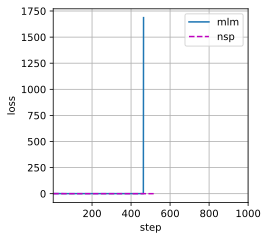

In [18]:
tr.train_bert(1000, use_animator=True)

In [17]:
torch.save(net.state_dict(), 'bert.pt')

In [20]:
net.load_state_dict(torch.load('bert.pt'))

<All keys matched successfully>